In [283]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [284]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [285]:
df.shape

(13320, 12)

In [286]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Lat,Lon,Nearby_Metro
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,12.846351,77.669098,No
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,12.895768,77.867101,No
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,12.905568,77.545544,No
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,13.002669,77.491542,No
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,13.061360,77.649389,No


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
 9   Lat           11949 non-null  float64
 10  Lon           11949 non-null  float64
 11  Nearby_Metro  13320 non-null  object 
dtypes: float64(5), object(7)
memory usage: 1.2+ MB


In [288]:
df.describe()

,bath,balcony,price,Lat,Lon
count,13247.000000,12711.000000,13320.000000,11949.000000,11949.000000
mean,2.692610,1.584376,112.565627,12.962486,77.630923
std,1.341458,0.817263,148.971674,0.138958,0.158083
min,1.000000,0.000000,8.000000,12.695014,76.108564
25%,2.000000,1.000000,50.000000,12.908945,77.580061
50%,2.000000,2.000000,72.000000,12.955257,77.630364
75%,3.000000,2.000000,120.000000,13.011019,77.670188
max,40.000000,3.000000,3600.000000,17.734263,83.278304


In [289]:
# from geopy.geocoders import Nominatim
# from geopy.distance import geodesic
# import time, os, pickle

# # --- Cache Setup ---
# CACHE_FILE = "geo_cache.pkl"
# cache = pickle.load(open(CACHE_FILE, "rb")) if os.path.exists(CACHE_FILE) else {}
# geo = Nominatim(user_agent="geo_app")

# def get_latlon(place):
#     if place in cache:
#         return cache[place]
#     try:
#         loc = geo.geocode(place)
#         if loc:
#             coords = (loc.latitude, loc.longitude)
#             cache[place] = coords
#             with open(CACHE_FILE, "wb") as f: pickle.dump(cache, f)
#             time.sleep(1)
#             return coords
#     except:
#         return None
#     return None

# def geo_df(df, col):
#     df[["Lat", "Lon"]] = df[col].apply(
#         lambda x: pd.Series(get_latlon(f"{x}, Bengaluru"))
#     )
#     return df

# def near_check(lat, lon, metro_df, radius=2):
#     # Check if the house location is valid
#     if pd.isna(lat) or pd.isna(lon):
#         return "No"
    
#     for _, r in metro_df.iterrows():
#         # Check if the metro station location is valid before calculating distance
#         if pd.isna(r["Lat"]) or pd.isna(r["Lon"]):
#             continue  # Skip to the next metro station if coordinates are missing
            
#         if geodesic((lat, lon), (r["Lat"], r["Lon"])).km <= radius:
#             return "Yes"
            
#     return "No"

# # --- Use ---
# metro_df = pd.read_csv("Namma_Metro_stations(Bengaluru).csv")
# df       = pd.read_csv("Housing_with_metro.csv")

# # metro_df = geo_df(metro_df, "Station Name (English)")
# # df       = geo_df(df, "location")

# df["Nearby_Metro"] = df.apply(lambda r: near_check(r["Lat"], r["Lon"], df), axis=1)

# df.to_csv("Housing_with_metro.csv", index=False)
# print("✅ Done! Missing locations marked as 'No'. File saved.")


In [290]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [291]:
df = df.drop(['society', 'balcony'], axis=1, errors='ignore')

df.head()

,area_type,availability,location,size,total_sqft,bath,price,Lat,Lon,Nearby_Metro
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,39.07,12.846351,77.669098,No
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,12.895768,77.867101,No
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,12.905568,77.545544,No
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,13.002669,77.491542,No
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,13.061360,77.649389,No


In [292]:
# df = df.dropna()
# print(df.shape)


In [293]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], shape=(1306,), dtype=object)

In [294]:
df['location'] = df['location'].fillna(df['location'].mode)

<Axes: ylabel='bath'>

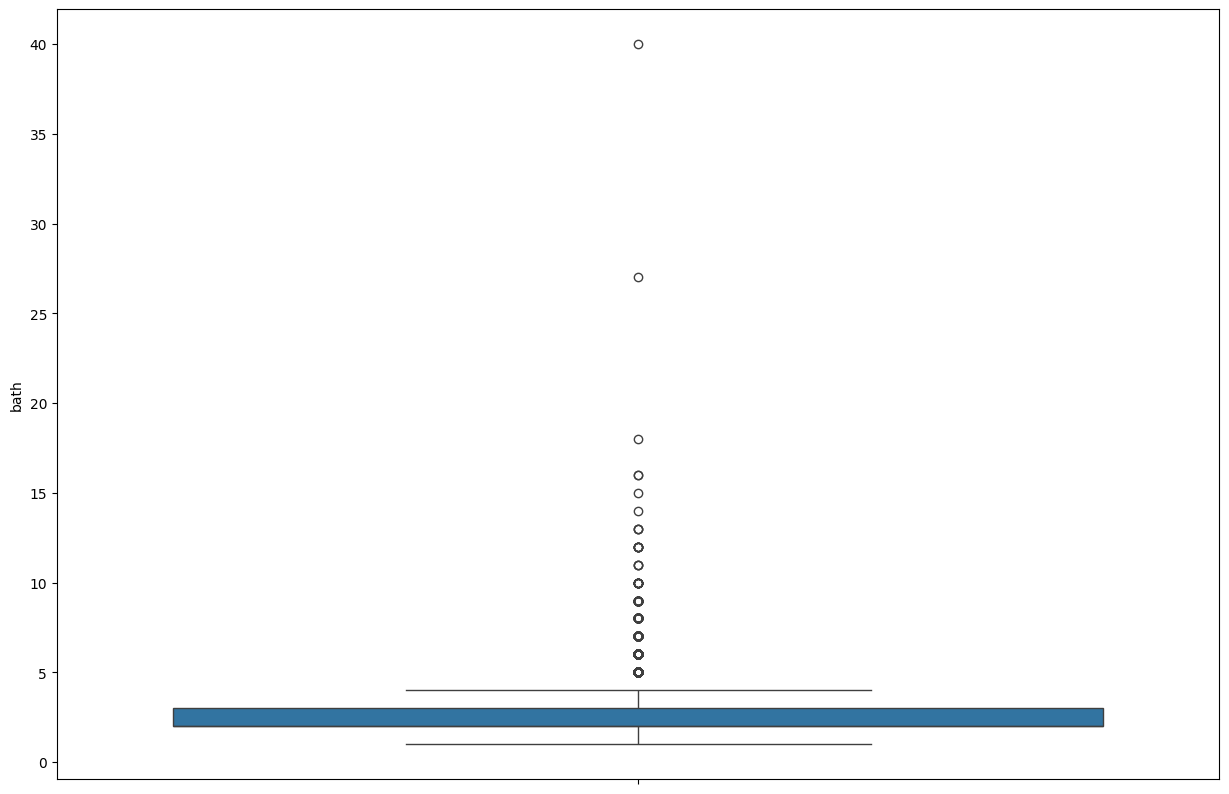

In [295]:
sns.boxplot(df['bath'])

In [296]:
# df['bath'] = df['bath'].fillna(df['bath'].median)

In [297]:
def extract_bhk(x):
    try:
        return int(str(x).split(' ')[0])   # works for '2 BHK', '3 Bedroom', '1 RK'
    except:
        return None

# Extract BHK
df['bhk'] = df['size'].apply(extract_bhk)
df['bhk'] = df['bhk'].fillna(df['bhk'].median())



In [298]:
# Cap bhk at 10
df['bhk'] = df['bhk'].apply(lambda x: 10 if x > 10 else x)

print(df['bhk'].value_counts().sort_index())


bhk
1.0      656
2.0     5528
3.0     4873
4.0     1417
5.0      356
6.0      221
7.0      100
8.0       89
9.0       54
10.0      26
Name: count, dtype: int64


In [299]:
df = df.drop(columns='size')


In [300]:
# 1. Fill missing bathrooms using bhk (if bath is NaN → set equal to bhk)
df['bath'] = df['bath'].fillna(df['bhk'])

# Convert bath column to numeric (if not already)
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

# 2. Cap unrealistic bathrooms (if bath > bhk+2 → set = bhk+2)
df.loc[df['bath'] > df['bhk'] + 2, 'bath'] = df['bhk'] + 1

# 3. If bath is still missing (rare edge cases), fill with median
df['bath'] = df['bath'].fillna(df['bath'].median())




In [301]:
df.isnull().sum()

area_type          0
availability       0
location           0
total_sqft         0
bath               0
price              0
Lat             1371
Lon             1371
Nearby_Metro       0
bhk                0
dtype: int64

In [302]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2117,), dtype=object)

In [303]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [304]:
df['total_sqft'].apply(is_float)

0        True
1        True
2        True
3        True
4        True
         ... 
13315    True
13316    True
13317    True
13318    True
13319    True
Name: total_sqft, Length: 13320, dtype: bool

In [305]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [306]:
convert_sqft_to_num('20-20')

20.0

In [307]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: convert_sqft_to_num(str(x)) if not isinstance(x, bool) else None)
df['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

In [308]:
df['total_sqft']= df['total_sqft'].fillna(df['total_sqft'].median())

In [309]:
df.loc[30]

area_type       Super built-up  Area
availability                  19-Dec
location                   Yelahanka
total_sqft                    2475.0
bath                             4.0
price                          186.0
Lat                        13.100698
Lon                        77.596345
Nearby_Metro                      No
bhk                              4.0
Name: 30, dtype: object

In [310]:
# Dataset year (since created ~6 years ago)
REF_YEAR = 2019

# Function to extract built year
def get_built_year(avail):
    avail = str(avail).lower()   # make it string + lowercase

    # Case 1: Availability is a year (e.g., "2017", "2020")
    if avail.isdigit():
        year = int(avail)
        return year if year <= REF_YEAR else REF_YEAR

    # Case 2: Availability is in "YY-Mon" format (e.g., "18-Jan")
    if "-" in avail:
        year_prefix = int(avail.split("-")[0])   # "18" from "18-Jan"
        year = 2000 + year_prefix                # 18 -> 2018
        return year if year <= REF_YEAR else REF_YEAR

    # Case 3: Ready/Immediate/Available
    if "ready" in avail or "immediate" in avail or "available" in avail:
        return REF_YEAR - 3   # assume 3 years old

    # Default case (if nothing matches)
    return REF_YEAR

# Apply function to create built_year column
df["built_year"] = df["availability"].apply(get_built_year)

# Calculate property age
df["property_age"] = REF_YEAR - df["built_year"]

# Categorize into buckets
df["age_segment"] = pd.cut(
    df["property_age"],
    bins=[-1, 2, 5, 10, 100],
    labels=["New", "Mid", "Old", "Very Old"]
)




In [311]:
df.shape

(13320, 13)

In [312]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.describe()

,total_sqft,bath,price,Lat,Lon,bhk,built_year,property_age,price_per_sqft
count,13320.000000,13320.000000,13320.000000,11949.000000,11949.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1558.647202,2.687162,112.565627,12.962486,77.630923,2.797523,2016.462012,2.537988,7.919404e+03
std,1236.376834,1.257798,148.971674,0.138958,0.158083,1.209335,0.951200,0.951200,1.062471e+05
min,1.000000,1.000000,8.000000,12.695014,76.108564,1.000000,2014.000000,0.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,12.908945,77.580061,2.000000,2016.000000,3.000000,4.266667e+03
50%,1276.000000,2.000000,72.000000,12.955257,77.630364,3.000000,2016.000000,3.000000,5.440000e+03
75%,1678.000000,3.000000,120.000000,13.011019,77.670188,3.000000,2016.000000,3.000000,7.328359e+03
max,52272.000000,12.000000,3600.000000,17.734263,83.278304,10.000000,2019.000000,5.000000,1.200000e+07


Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [313]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(10165, 14)

In [314]:
# Function to remove outliers based on standard deviation
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        # Keep only the data points within one standard deviation
        reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

# Apply the function to your DataFrame
df = remove_pps_outliers(df)
print(df.shape)

(6745, 14)


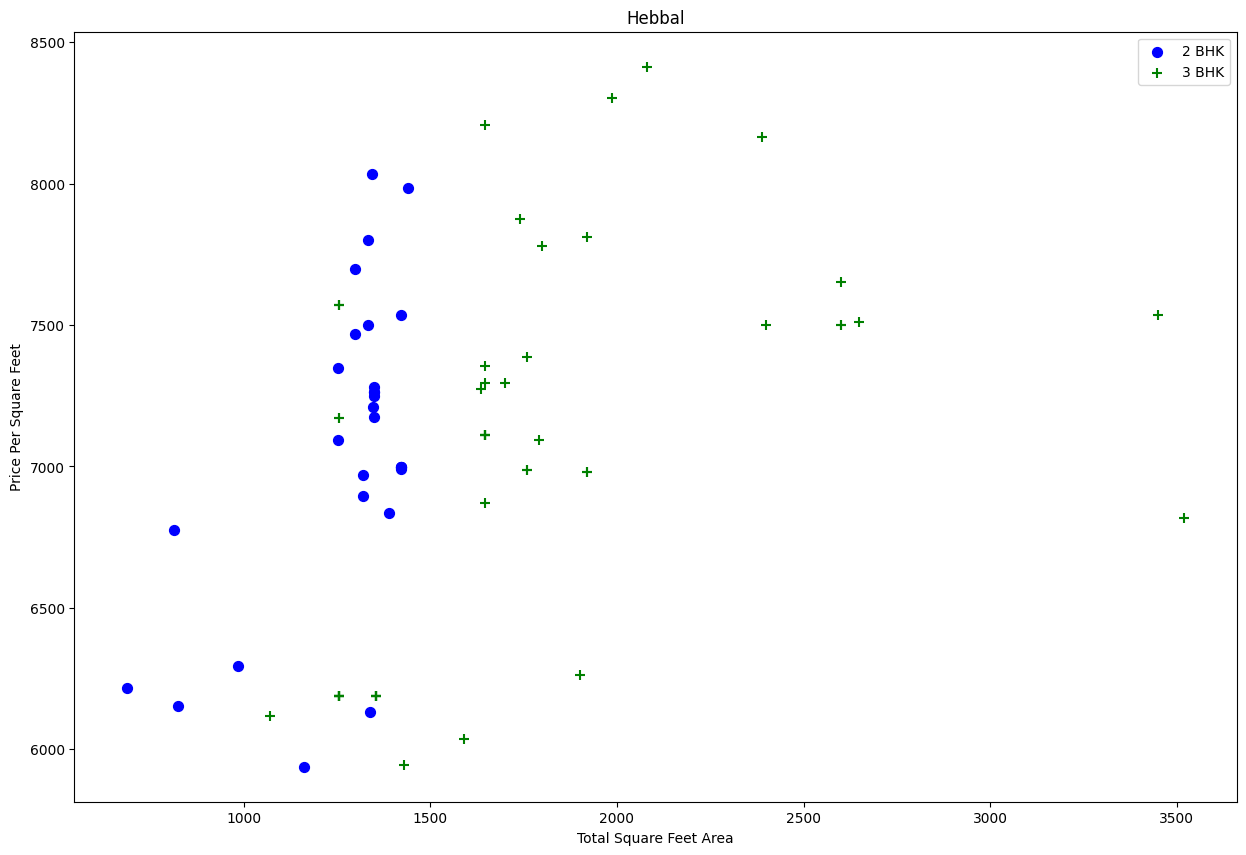

In [315]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df, "Hebbal")

In [316]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df = remove_bhk_outliers(df)
df.shape

(5370, 14)

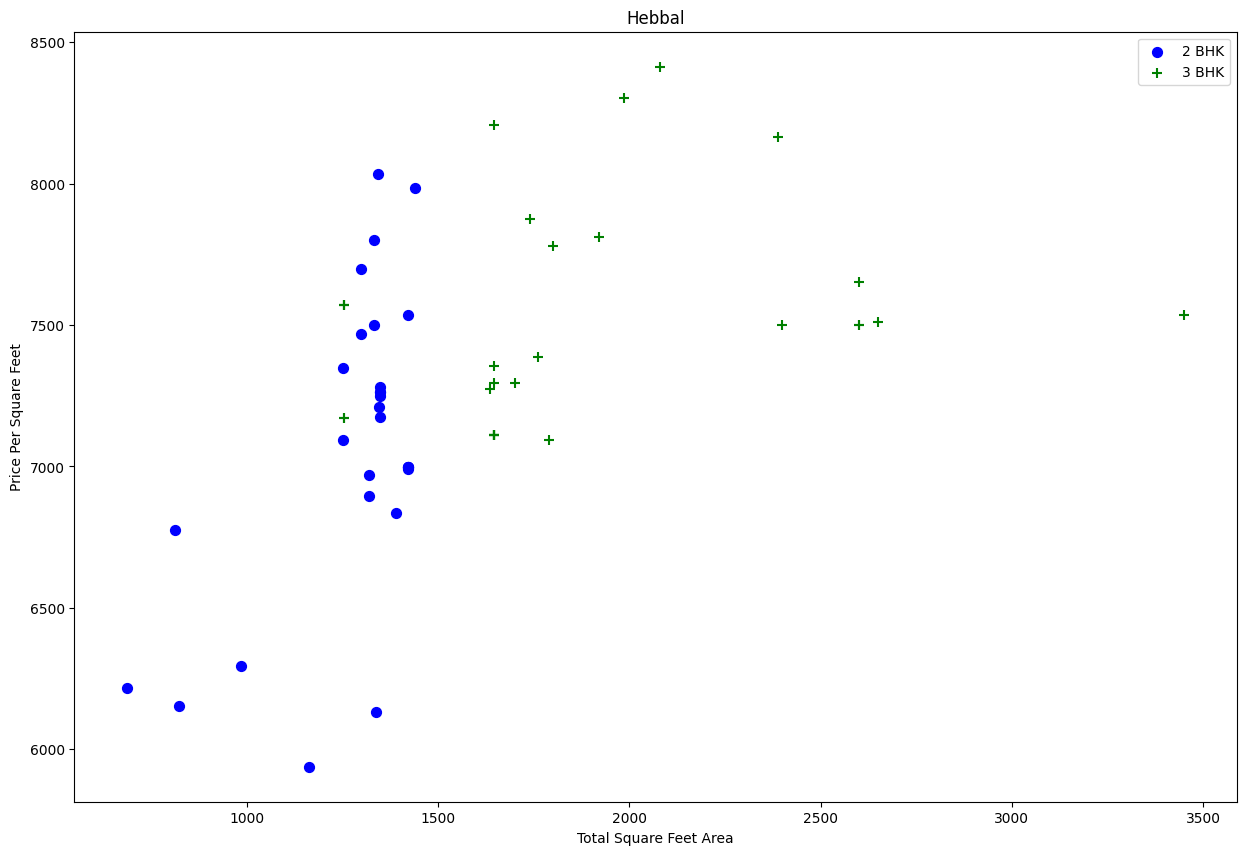

In [317]:
plot_scatter_chart(df, "Hebbal")

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5370 entries, 0 to 6744
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   area_type       5370 non-null   object  
 1   availability    5370 non-null   object  
 2   location        5370 non-null   object  
 3   total_sqft      5370 non-null   float64 
 4   bath            5370 non-null   float64 
 5   price           5370 non-null   float64 
 6   Lat             4929 non-null   float64 
 7   Lon             4929 non-null   float64 
 8   Nearby_Metro    5370 non-null   object  
 9   bhk             5370 non-null   float64 
 10  built_year      5370 non-null   int64   
 11  property_age    5370 non-null   int64   
 12  age_segment     5370 non-null   category
 13  price_per_sqft  5370 non-null   float64 
dtypes: category(1), float64(7), int64(2), object(4)
memory usage: 592.8+ KB


In [319]:
df = df.drop(columns=['price_per_sqft'])

In [320]:
df.head(10)

,area_type,availability,location,total_sqft,bath,price,Lat,Lon,Nearby_Metro,bhk,built_year,property_age,age_segment
0,Built-up Area,Ready To Move,Devarabeesana Halli,1750.0,3.0,149.0,NaN,NaN,No,3.0,2016,3,Mid
1,Super built-up Area,Ready To Move,Devarabeesana Halli,1750.0,3.0,150.0,NaN,NaN,No,3.0,2016,3,Mid
2,Super built-up Area,18-May,Devarachikkanahalli,1250.0,2.0,44.0,12.902018,77.601587,Yes,3.0,2018,1,New
3,Super built-up Area,Ready To Move,Devarachikkanahalli,1170.0,2.0,40.0,12.902018,77.601587,Yes,2.0,2016,3,Mid
4,Super built-up Area,Ready To Move,Devarachikkanahalli,1425.0,2.0,65.0,12.902018,77.601587,Yes,3.0,2016,3,Mid
5,Super built-up Area,Ready To Move,Devarachikkanahalli,947.0,2.0,43.0,12.902018,77.601587,Yes,2.0,2016,3,Mid
6,Super built-up Area,Ready To Move,Devarachikkanahalli,1230.0,2.0,58.0,12.902018,77.601587,Yes,2.0,2016,3,Mid
7,Super built-up Area,Ready To Move,Devarachikkanahalli,1705.0,3.0,75.0,12.902018,77.601587,Yes,3.0,2016,3,Mid
8,Built-up Area,Ready To Move,Devarachikkanahalli,1116.0,2.0,47.0,12.902018,77.601587,Yes,2.0,2016,3,Mid
9,Super built-up Area,Ready To Move,Devarachikkanahalli,991.0,2.0,40.0,12.902018,77.601587,Yes,2.0,2016,3,Mid


In [321]:
df = df.drop(columns=['Lat','Lon'],axis=1)

In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5370 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   area_type     5370 non-null   object  
 1   availability  5370 non-null   object  
 2   location      5370 non-null   object  
 3   total_sqft    5370 non-null   float64 
 4   bath          5370 non-null   float64 
 5   price         5370 non-null   float64 
 6   Nearby_Metro  5370 non-null   object  
 7   bhk           5370 non-null   float64 
 8   built_year    5370 non-null   int64   
 9   property_age  5370 non-null   int64   
 10  age_segment   5370 non-null   category
dtypes: category(1), float64(4), int64(2), object(4)
memory usage: 466.9+ KB


In [323]:
X = df.drop(columns=['price'])
y = df['price']

In [324]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [325]:
cat_col = X.select_dtypes(include=['object','category']).columns.tolist()
num_col = X.select_dtypes(include='number').columns.tolist()
cat_col

['area_type', 'availability', 'location', 'Nearby_Metro', 'age_segment']

In [326]:
std = StandardScaler()
Xtrain_num = std.fit_transform(Xtrain[num_col])
Xtest_num = std.transform(Xtest[num_col])

In [327]:
Xtrain_num = pd.DataFrame(
    Xtrain_num,
    index=Xtrain.index,
    columns= Xtrain.select_dtypes('number').columns.tolist()
)

Xtest_num = pd.DataFrame(
    Xtest_num,
    index=Xtest.index,
    columns=Xtest.select_dtypes('number').columns.tolist()
)

In [328]:
hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
Xtrain_cat = hot.fit_transform(Xtrain[cat_col])
Xtest_cat = hot.transform(Xtest[cat_col])

In [329]:
Xtrain_cat = pd.DataFrame(
    Xtrain_cat,
    index=Xtrain.index,
    columns=hot.get_feature_names_out(cat_col)
)
Xtest_cat = pd.DataFrame(
    Xtest_cat,
    index=Xtest.index,
    columns=hot.get_feature_names_out(cat_col)

)

In [330]:
Xtrain_final = pd.concat([Xtrain_num,Xtrain_cat],axis=1)
Xtest_final = pd.concat([Xtest_num,Xtest_cat],axis=1)

In [331]:
Xtrain_final.shape

(4296, 651)

In [332]:
Xtest_final.shape

(1074, 651)

In [333]:
model = LinearRegression()
model.fit(Xtrain_final,Ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [334]:
model.score(Xtrain_final,Ytrain)

0.9586584597151575

In [335]:
model.score(Xtest_final,Ytest)

0.8277237466849875

Linear Regression Parameters

In [363]:
# Define parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [-1]  # use all processors
}

# Create GridSearchCV
grid_lr = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='r2')
grid_lr.fit(Xtrain_final, Ytrain)

print("Best Parameters:", grid_lr.best_params_)
print("Best CV R²:", grid_lr.best_score_)

# Evaluate on test
test_score = grid_lr.score(Xtest_final, Ytest)
print("Train Score:", grid_lr.score(Xtrain_final,Ytrain))
print("Test R² Score:", test_score)


Best Parameters: {'fit_intercept': True, 'n_jobs': -1}
Best CV R²: 0.8843664086146459
Train Score: 0.9586584597151575
Test R² Score: 0.8277237466849875


HyperParamter For Lasso

In [364]:
from sklearn.linear_model import Lasso


# Lasso param grid
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'fit_intercept': [True, False]
}

lasso_grid = GridSearchCV(
    Lasso(max_iter=10000),
    lasso_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

lasso_grid.fit(Xtrain_final, Ytrain)

y_pred_lasso = lasso_grid.predict(Xtest_final)

print("📌 Lasso Results")
print("Best Params:", lasso_grid.best_params_)
print("CV R²:", lasso_grid.best_score_)
print("Train Score:", lasso_grid.score(Xtrain_final, Ytrain))
print("Test R²:", lasso_grid.score(Xtest_final, Ytest))
print("Test RMSE:", np.sqrt(mean_squared_error(Ytest, y_pred_lasso)))
print("Test MAE:", mean_absolute_error(Ytest, y_pred_lasso))


📌 Lasso Results
Best Params: {'alpha': 0.01, 'fit_intercept': False}
CV R²: 0.8822549275836004
Train Score: 0.9527964581976167
Test R²: 0.8205091971978687
Test RMSE: 29.65439819863766
Test MAE: 13.858089289848976


HyperParameter for RidgeLasso

In [365]:
from sklearn.linear_model import Ridge

ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'fit_intercept': [True, False]
}

ridge_grid = GridSearchCV(
    Ridge(),
    ridge_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

ridge_grid.fit(Xtrain_final, Ytrain)

y_pred_ridge = ridge_grid.predict(Xtest_final)

print("\n📌 Ridge Results")
print("Best Params:", ridge_grid.best_params_)
print("CV R²:", ridge_grid.best_score_)
print("Train Score:", ridge_grid.score(Xtrain_final, Ytrain))
print("Test R²:", ridge_grid.score(Xtest_final, Ytest))
print("Test RMSE:", np.sqrt(mean_squared_error(Ytest, y_pred_ridge)))
print("Test MAE:", mean_absolute_error(Ytest, y_pred_ridge))



📌 Ridge Results
Best Params: {'alpha': 0.1, 'fit_intercept': True}
CV R²: 0.8907202397398255
Train Score: 0.9582151256793515
Test R²: 0.8376355632389193
Test RMSE: 28.20417950714928
Test MAE: 12.845805716862262


HyperParamter for ElasticNet L1+L2

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'fit_intercept': [True, False]
}

elastic_grid = GridSearchCV(
    ElasticNet(max_iter=10000),
    elastic_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

elastic_grid.fit(Xtrain_final, Ytrain)

y_pred_elastic = elastic_grid.predict(Xtest_final)

print("\n📌 ElasticNet Results")
print("Best Params:", elastic_grid.best_params_)
print("CV R²:", elastic_grid.best_score_)
print("Train Score:", elastic_grid.score(Xtrain_final, Ytrain))
print("Test R²:", elastic_grid.score(Xtest_final, Ytest))
print("Test RMSE:", np.sqrt(mean_squared_error(Ytest, y_pred_elastic)))
print("Test MAE:", mean_absolute_error(Ytest, y_pred_elastic))


In [366]:
def predict_price(location, sqft, bath, bhk, area_type, availability='Ready To Move', nearby_metro='No', built_year=2016, property_age=3, age_segment='Mid'):
    # Build a single-row dataframe with all required columns
    input_dict = {
        'total_sqft': [sqft],
        'bath': [bath],
        'bhk': [bhk],
        'built_year': [built_year],
        'property_age': [property_age],
        'area_type': [area_type],
        'availability': [availability],
        'location': [location],
        'Nearby_Metro': [nearby_metro],
        'age_segment': [age_segment]
    }
    input_df = pd.DataFrame(input_dict)

    # Scale numerical columns
    input_num = std.transform(input_df[num_col])
    input_num_df = pd.DataFrame(input_num, columns=num_col)

    # One-hot encode categorical columns
    input_cat = hot.transform(input_df[cat_col])
    input_cat_df = pd.DataFrame(input_cat, columns=hot.get_feature_names_out(cat_col))

    # Concatenate numerical and categorical features
    input_final = pd.concat([input_num_df, input_cat_df], axis=1)

    # Align columns with training data (add missing columns as zeros)
    for col in Xtrain_final.columns:
        if col not in input_final.columns:
            input_final[col] = 0
    input_final = input_final[Xtrain_final.columns]

    # Predict using the best decision tree model from grid search
    return elastic_grid.predict(input_final)[0]


In [340]:
# model1 = LogisticRegression()
dt_Model= DecisionTreeRegressor(random_state=42)

In [341]:
dt_Model.fit(Xtrain_final,Ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [342]:
# Step 3: Predictions
y_pred_train = dt_Model.predict(Xtrain_final)
y_pred_test = dt_Model.predict(Xtest_final)
# Step 4: Evaluation
print("📌 Decision Tree Results")

# Train
print("Train R² Score:", r2_score(Ytrain, y_pred_train))

# Test
print("Test R² Score:", r2_score(Ytest, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(Ytest, y_pred_test)))
print("Test MAE:", mean_absolute_error(Ytest, y_pred_test))

📌 Decision Tree Results
Train R² Score: 0.9995323453904515
Test R² Score: 0.7684588564733885
Test RMSE: 33.68077699627581
Test MAE: 14.986568239643658


hyperParametr for decisionTreeRegressor

In [343]:
# params={
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'C': [100, 10, 1.0, 0.1, 0.01],
#     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
# }

params = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,10],
    'max_features': [None, 'sqrt', 'log2']
}  





In [344]:

# Fix: Use DecisionTreeRegressor as estimator
grid = GridSearchCV(
	estimator=dt_Model,
	param_grid=params,
	scoring='r2',
	cv=5,
	n_jobs=-1
)
grid.fit(Xtrain_final, Ytrain)

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': [None, 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [345]:
print("Best Params:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

Best Params: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best CV R²: 0.7688854685520179


In [346]:
# Evaluate best model
best_dt = grid.best_estimator_
y_pred = best_dt.predict(Xtest_final)

print("Test R² Score:", r2_score(Ytest, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(Ytest, y_pred)))
print("Test MAE:", mean_absolute_error(Ytest, y_pred))

Test R² Score: 0.679014302273396
Test RMSE: 39.65617805420583
Test MAE: 22.03456916997722


In [347]:
print('train Score :', grid.score(Xtrain_final, Ytrain))
print('test Score :', grid.score(Xtest_final, Ytest))

train Score : 0.8354449905572757
test Score : 0.679014302273396


Test the model for few properties

In [349]:
def predict_price(location, sqft, bath, bhk, area_type, availability='Ready To Move', nearby_metro='No', built_year=2016, property_age=3, age_segment='Mid'):
    # Build a single-row dataframe with all required columns
    input_dict = {
        'total_sqft': [sqft],
        'bath': [bath],
        'bhk': [bhk],
        'built_year': [built_year],
        'property_age': [property_age],
        'area_type': [area_type],
        'availability': [availability],
        'location': [location],
        'Nearby_Metro': [nearby_metro],
        'age_segment': [age_segment]
    }
    input_df = pd.DataFrame(input_dict)

    # Scale numerical columns
    input_num = std.transform(input_df[num_col])
    input_num_df = pd.DataFrame(input_num, columns=num_col)

    # One-hot encode categorical columns
    input_cat = hot.transform(input_df[cat_col])
    input_cat_df = pd.DataFrame(input_cat, columns=hot.get_feature_names_out(cat_col))

    # Concatenate numerical and categorical features
    input_final = pd.concat([input_num_df, input_cat_df], axis=1)

    # Align columns with training data (add missing columns as zeros)
    for col in Xtrain_final.columns:
        if col not in input_final.columns:
            input_final[col] = 0
    input_final = input_final[Xtrain_final.columns]

    # Predict using the best decision tree model from grid search
    return best_dt.predict(input_final)[0]



In [350]:
Xtrain.head()

,area_type,availability,location,total_sqft,bath,Nearby_Metro,bhk,built_year,property_age,age_segment
6072,Super built-up Area,Ready To Move,Volagerekallahalli,1070.0,2.0,No,2.0,2016,3,Mid
5528,Super built-up Area,21-Dec,Talaghattapura,2106.0,3.0,No,3.0,2019,0,New
3530,Super built-up Area,Ready To Move,Kaverappa Layout,1540.0,3.0,Yes,3.0,2016,3,Mid
5331,Super built-up Area,18-May,Sector 6 HSR Layout,3000.0,5.0,No,4.0,2018,1,New
2903,Super built-up Area,Ready To Move,Indira Nagar,1260.0,2.0,Yes,2.0,2016,3,Mid


In [351]:
# A 2BHK apartment in Whitefield
location = "Whitefield"
sqft = 1250
bath = 2
bhk = 2
area_type = 'Super built-up  Area'
availability = 'Ready To Move'
nearby_metro = 'No'
built_year = 2018
property_age = 7 # based on 2025 current year
age_segment= 'New'


# Now, call your function with these values
price_prediction = predict_price(
    location=location,
    sqft=sqft,
    bath=bath,
    bhk=bhk,
    area_type=area_type,
    availability=availability,
    nearby_metro=nearby_metro,
    built_year=built_year,
    property_age=property_age,
    age_segment= age_segment
)

print(f"The predicted price for a {bhk} BHK apartment is: {price_prediction}")

The predicted price for a 2 BHK apartment is: 67.82673022598877


In [352]:
# A 4BHK house in a well-known residential area
location = "Jayanagar"
sqft = 2500
bath = 4
bhk = 4
area_type = 'Built-up Area'
availability = 'Ready To Move'
nearby_metro = 'Yes'
built_year = 2010
property_age = 15 # based on 2025 current year
age_segment = 'Old'

# Now, call your function with these values
price_prediction = predict_price(
    location=location,
    sqft=sqft,
    bath=bath,
    bhk=bhk,
    area_type=area_type,
    availability=availability,
    nearby_metro=nearby_metro,
    built_year=built_year,
    property_age=property_age,
    age_segment=age_segment
)

print(f"The predicted price for a {bhk} BHK house is: {price_prediction}")

The predicted price for a 4 BHK house is: 232.34545454545454


In [353]:
# A tiny apartment with an implausibly high number of bedrooms
location = "Electronic City"
sqft = 500
bath = 4
bhk = 6
area_type = 'Super built-up Area'
availability = 'Ready To Move'
nearby_metro = 'Yes'
built_year = 2020
property_age = 5
age_segment = 'New'
price_prediction = predict_price(
    location=location,
    sqft=sqft,
    bath=bath,
    bhk=bhk,
    area_type=area_type,
    availability=availability,
    nearby_metro=nearby_metro,
    built_year=built_year,
    property_age=property_age,
    age_segment=age_segment
)

print(f"The predicted price for a {bhk} BHK house is: {price_prediction}")

The predicted price for a 6 BHK house is: 85.91239130434784


In [354]:
# A brand-new property that is categorized as "Old"
location = "Whitefield"
sqft = 1200
bath = 2
bhk = 2
area_type = 'Super built-up Area'
availability = 'Ready To Move'
nearby_metro = 'No'
built_year = 2024
property_age = 1
age_segment = 'Old'

price_prediction = predict_price(
    location=location,
    sqft=sqft,
    bath=bath,
    bhk=bhk,
    area_type=area_type,
    availability=availability,
    nearby_metro=nearby_metro,
    built_year=built_year,
    property_age=property_age,
    age_segment=age_segment
)

print(f"The predicted price for a {bhk} BHK house is: {price_prediction}")

The predicted price for a 2 BHK house is: 67.82673022598877


In [355]:
# A massive plot with very few bathrooms, indicating it might be a special-use property
location = "Jayanagar"
sqft = 5500
bath = 3
bhk = 4
area_type = 'Plot Area'
availability = 'Ready To Move'
nearby_metro = 'Yes'
built_year = 2005
property_age = 20
age_segment = 'Old'
price_prediction = predict_price(
    location=location,
    sqft=sqft,
    bath=bath,
    bhk=bhk,
    area_type=area_type,
    availability=availability,
    nearby_metro=nearby_metro,
    built_year=built_year,
    property_age=property_age,
    age_segment=age_segment
)

print(f"The predicted price for a {bhk} BHK house is: {price_prediction}")

The predicted price for a 4 BHK house is: 349.18518518518516


RandomForest

In [356]:
# from sklearn.ensemble import RandomForestRegressor

# # Plain Random Forest
# rf = RandomForestRegressor(random_state=42)   # no tuning, just defaults
# rf.fit(Xtrain_final, Ytrain)

In [357]:
# # Predictions
# y_train_pred = rf.predict(Xtrain_final)
# y_test_pred = rf.predict(Xtest_final)

# # Train & Test scores
# print("📌 Random Forest Results")
# print("Train R² Score:", r2_score(Ytrain, y_train_pred))
# print("Test R² Score:", r2_score(Ytest, y_test_pred))
# print("Test RMSE:", np.sqrt(mean_squared_error(Ytest, y_test_pred)))
# print("Test MAE:", mean_absolute_error(Ytest, y_test_pred))

# Output
# 📌 Random Forest Results
# Train R² Score: 0.9648618329629745
# Test R² Score: 0.7456200417632202
# Test RMSE: 70.78937298443603
# Test MAE: 22.111572188621537

HyperParameter for RandomForest

In [358]:
# param_grid = {
#     'n_estimators': [100, 200, 300],         # number of trees
#     'max_depth': [None, 5, 10, 15],          # depth of trees
#     'min_samples_split': [2, 5, 10],         # min samples to split
#     'min_samples_leaf': [1, 2, 4],           # min samples per leaf
#     'max_features': [ 'sqrt', 'log2', None] # features considered at each split
# }
# # GridSearchCV
# grid = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='r2',
#     n_jobs=-1,
#     verbose=2
# )

# grid.fit(Xtrain_final, Ytrain)

In [359]:
# # Best params
# print("Best Params:", grid.best_params_)
# print("Best CV R²:", grid.best_score_)

# # Evaluate on train & test
# best_rf = grid.best_estimator_
# print("Train R²:", best_rf.score(Xtrain_final, Ytrain))
# print("Test R²:", best_rf.score(Xtest_final, Ytest))



# outPut 
# Best Params: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
# Best CV R²: 0.7514550403157545
# Train R²: 0.9650128451981212
# Test R²: 0.7306509154941683

RandomSearchCV

In [360]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# from sklearn.ensemble import RandomForestRegressor

# # Base RF model
# rfr = RandomForestRegressor(random_state=42, n_jobs=-1)

# # Param distributions (continuous/random ranges instead of fixed lists)
# param_dist = {
#     'n_estimators': randint(100, 400),       # random int between 100 and 400
#     'max_depth': [None] + list(range(5, 16)), # None or between 5–15
#     'min_samples_split': randint(2, 10),    # random int 2–9
#     'min_samples_leaf': randint(1, 5),      # random int 1–4
#     'max_features': ['sqrt', 'log2']        # categorical
# }

# # Randomized Search
# random_search_rfr = RandomizedSearchCV(
#     estimator=rfr,
#     param_distributions=param_dist,
#     n_iter=300,      # try 30 random combinations
#     cv=5,           # fewer folds = faster
#     scoring='r2',
#     n_jobs=-1,
#     verbose=2,
#     random_state=42
# )

# # Fit
# random_search_rfr.fit(Xtrain_final, Ytrain)


In [361]:
# # Predict on test
# y_pred = random_search_rfr.best_estimator_.predict(Xtest_final)
# y_train_pred = random_search_rfr.best_estimator_.predict(Xtest_final)

# # Evaluate
# print("Best Params:", random_search_rfr.best_params_)
# print("Best CV Score:", random_search_rfr.best_score_)
# print("Train R²:", r2_score(Ytest, y_train_pred))
# print("Test R²:", r2_score(Ytest, y_pred))
# print("Test MAE:", mean_absolute_error(Ytest, y_pred))
# print("Test RMSE:", np.sqrt(mean_squared_error(Ytest, y_pred)))





# output 
# Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 203}
# Best CV Score: 0.7009058502181043
# Train R²: 0.6337837241243041
# Test R²: 0.633783724124304
# Test MAE: 22.931131055229013
# Test RMSE: 84.93671117166521